In [4]:
import pandas as pd

train=pd.read_csv(r'F:\Datasets\Online Sales Prediction\train.csv')
train.head(4)
train.shape
train.drop('Store',axis=1,inplace=True)
train.drop('Date',axis=1,inplace=True)
train.info()
print('\n The correlation matrix is :')
train.corr()

C:\Users\Aniruddha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 7 columns):
DayOfWeek        1017209 non-null int64
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(6), object(1)
memory usage: 54.3+ MB

 The correlation matrix is :


,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
DayOfWeek,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388
Sales,-0.462125,1.000000,0.894711,0.678472,0.452345,0.085124
Customers,-0.386445,0.894711,1.000000,0.616768,0.316169,0.071568
Open,-0.528963,0.678472,0.616768,1.000000,0.295042,0.086171
Promo,-0.392925,0.452345,0.316169,0.295042,1.000000,0.067483
SchoolHoliday,-0.205388,0.085124,0.071568,0.086171,0.067483,1.000000


In [2]:
import numpy as np
# Maximum Sales by day of week in descending order
train.groupby('DayOfWeek').aggregate({'Sales':max}).sort_values(by=['Sales'],ascending=False)

# Maximum Sales by promo
train.groupby('Promo').aggregate({'Sales':max})

# Maximum Sales by School Holiday
train.groupby('SchoolHoliday').aggregate({'Sales':max})

# Median Sales and Maximum Customers by Open status
train.groupby('Open').aggregate({'Sales':np.median,'Customers':max})

# Maximum sales and median of customers by Promo and DayOfWeek in descending order
train.groupby(['Promo','DayOfWeek']).aggregate({'Sales': max,'Customers': np.median}).sort_values(by=['Sales'],ascending=False)

Sales  Customers
Promo DayOfWeek                  
0     1          41551        617
1     5          38722        716
0     4          38367        576
1     1          38037        855
0     7          37376          0
1     4          34814        709
      2          34692        751
0     5          33934        646
1     3          33151        708
0     2          31930        599
      6          31683        571
      3          26818        587

Text(0.5,0,'Customers')

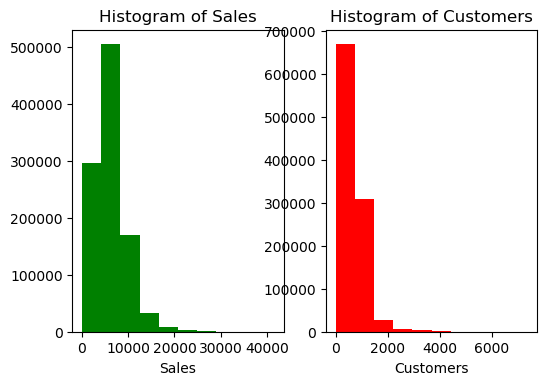

In [8]:
#Data Visualization

import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,2,dpi=100)

ax[0].hist(train['Sales'],color='green')
ax[0].set_title("Histogram of Sales")
ax[0].set_xlabel('Sales')

ax[1].hist(train['Customers'],color='red')
ax[1].set_title("Histogram of Customers")
ax[1].set_xlabel("Customers")

In [18]:
#One hot encoding
one_hot=pd.get_dummies(train,columns=['DayOfWeek','StateHoliday'])
one_hot.head(3)

#Deleting rows where sales=0
one_hot=one_hot[one_hot.Sales>0]

In [21]:
from sklearn.model_selection import train_test_split
cols=list(one_hot.columns)
cols[13]='StateHoliday_1'
one_hot.columns=cols
one_hot.head(3)

x=one_hot.iloc[:,1:]
y=one_hot.iloc[:,0]

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=46)

print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)



(591036, 16) (591036,)
(253302, 16) (253302,)


In [22]:
import xgboost as xgb

dtrain=xgb.DMatrix(xtrain,label=ytrain)
dtest=xgb.DMatrix(xtest,label=ytest)

params={'max_depth':6,'eta':0.13,'booster':'gbtree','eval_metric':'rmse'}
eval_list=[(dtest,'eval'),(dtrain,'train')]

xgb_model1=xgb.train(params,dtrain,num_boost_round=500,maximize=False,evals=eval_list,early_stopping_rounds=30)


[20:52:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[0]	eval-rmse:6658.91	train-rmse:6672.55
Multiple eval metrics have been passed: 'train-rmse' will be used for early stopping.

Will train until train-rmse hasn't improved in 30 rounds.
[20:52:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[1]	eval-rmse:5840.36	train-rmse:5853.05
[20:52:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[2]	eval-rmse:5134.51	train-rmse:5146.4
[20:52:13] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[3]	eval-rmse:4527.63	train-rmse:4538.91
[20:52:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree

KeyboardInterrupt: 

[10]	eval-rmse:2196.97	train-rmse:2203.71
[20:52:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[11]	eval-rmse:2047.71	train-rmse:2053.69
[20:52:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[12]	eval-rmse:1926.57	train-rmse:1931.85
[20:52:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[13]	eval-rmse:1829.66	train-rmse:1834.29
[20:52:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[14]	eval-rmse:1752.63	train-rmse:1756.57
[20:52:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[15]	eval-rmse:1691.86	train-r

KeyboardInterrupt: 

KeyboardInterrupt: 

In [23]:
params2={'max_depth':3,'eval_metric':'rmse','eta':0.1,'booster':'gbtree'}

xgb_model2=xgb.train(params2,dtrain,num_boost_round=500,evals=eval_list,early_stopping_rounds=30,maximize=False)

[20:52:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[0]	eval-rmse:6886.91	train-rmse:6900.75
Multiple eval metrics have been passed: 'train-rmse' will be used for early stopping.

Will train until train-rmse hasn't improved in 30 rounds.
[20:52:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[1]	eval-rmse:6242.36	train-rmse:6255.86
[20:52:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[2]	eval-rmse:5665.33	train-rmse:5678.53
[20:52:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[3]	eval-rmse:5149.89	train-rmse:5162.85
[20:52:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pr

[20:53:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[42]	eval-rmse:1509.86	train-rmse:1509.44
[20:53:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[43]	eval-rmse:1508.77	train-rmse:1508.28
[20:53:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[44]	eval-rmse:1507.85	train-rmse:1507.28
[20:53:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[45]	eval-rmse:1505.98	train-rmse:1505.38
[20:53:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[46]	eval-rmse:1505.11	train-rmse:1504.53
[20:53:02] C:\Users\Administrator\D

[20:53:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[85]	eval-rmse:1491.87	train-rmse:1490.57
[20:53:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[86]	eval-rmse:1491.84	train-rmse:1490.54
[20:53:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[87]	eval-rmse:1491.79	train-rmse:1490.47
[20:53:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[88]	eval-rmse:1491.63	train-rmse:1490.3
[20:53:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[89]	eval-rmse:1491.38	train-rmse:1490.07
[20:53:20] C:\Users\Administrator\De

[20:53:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[128]	eval-rmse:1488.92	train-rmse:1487.22
[20:53:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[129]	eval-rmse:1488.91	train-rmse:1487.21
[20:53:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[130]	eval-rmse:1488.87	train-rmse:1487.15
[20:53:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[131]	eval-rmse:1488.82	train-rmse:1487.09
[20:53:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[132]	eval-rmse:1488.73	train-rmse:1487.02
[20:53:38] C:\Users\Administra

[20:53:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[171]	eval-rmse:1487.98	train-rmse:1485.66
[20:53:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[172]	eval-rmse:1487.99	train-rmse:1485.62
[20:53:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[173]	eval-rmse:1487.98	train-rmse:1485.6
[20:53:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[174]	eval-rmse:1487.96	train-rmse:1485.57
[20:53:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[175]	eval-rmse:1487.95	train-rmse:1485.54
[20:53:57] C:\Users\Administrat

[20:54:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[214]	eval-rmse:1487.43	train-rmse:1484.39
[20:54:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[215]	eval-rmse:1487.43	train-rmse:1484.35
[20:54:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[216]	eval-rmse:1487.37	train-rmse:1484.29
[20:54:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[217]	eval-rmse:1487.35	train-rmse:1484.25
[20:54:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[218]	eval-rmse:1487.34	train-rmse:1484.23
[20:54:17] C:\Users\Administra

[20:54:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[257]	eval-rmse:1487.14	train-rmse:1483.41
[20:54:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[258]	eval-rmse:1487.13	train-rmse:1483.39
[20:54:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[259]	eval-rmse:1487.08	train-rmse:1483.35
[20:54:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[260]	eval-rmse:1487.08	train-rmse:1483.32
[20:54:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[261]	eval-rmse:1487.06	train-rmse:1483.3
[20:54:36] C:\Users\Administrat

[20:54:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[300]	eval-rmse:1486.75	train-rmse:1482.5
[20:54:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[301]	eval-rmse:1486.75	train-rmse:1482.47
[20:54:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[302]	eval-rmse:1486.7	train-rmse:1482.43
[20:54:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[303]	eval-rmse:1486.68	train-rmse:1482.4
[20:54:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[304]	eval-rmse:1486.68	train-rmse:1482.38
[20:54:54] C:\Users\Administrator

[20:55:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[343]	eval-rmse:1486.34	train-rmse:1481.45
[20:55:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[344]	eval-rmse:1486.34	train-rmse:1481.44
[20:55:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[345]	eval-rmse:1486.35	train-rmse:1481.41
[20:55:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[346]	eval-rmse:1486.35	train-rmse:1481.38
[20:55:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[347]	eval-rmse:1486.36	train-rmse:1481.37
[20:55:11] C:\Users\Administra

[385]	eval-rmse:1486.23	train-rmse:1480.74
[20:55:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[386]	eval-rmse:1486.22	train-rmse:1480.72
[20:55:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[387]	eval-rmse:1486.23	train-rmse:1480.69
[20:55:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[388]	eval-rmse:1486.23	train-rmse:1480.66
[20:55:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[389]	eval-rmse:1486.22	train-rmse:1480.66
[20:55:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[390]	eval-rmse:1486.22	train-r

[428]	eval-rmse:1486.12	train-rmse:1479.94
[20:55:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[429]	eval-rmse:1486.12	train-rmse:1479.92
[20:55:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[430]	eval-rmse:1486.12	train-rmse:1479.91
[20:55:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[431]	eval-rmse:1486.11	train-rmse:1479.88
[20:55:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[432]	eval-rmse:1486.12	train-rmse:1479.86
[20:55:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[433]	eval-rmse:1486.12	train-

[471]	eval-rmse:1485.95	train-rmse:1479.21
[20:56:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[472]	eval-rmse:1485.95	train-rmse:1479.18
[20:56:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[473]	eval-rmse:1485.95	train-rmse:1479.17
[20:56:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[474]	eval-rmse:1485.95	train-rmse:1479.15
[20:56:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[475]	eval-rmse:1485.95	train-rmse:1479.14
[20:56:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[476]	eval-rmse:1485.95	train-

In [27]:
params3={'max_depth':6,'eval_metric':'rmse','eta':0.15,'booster':'gbtree'}

xgb_model3=xgb.train(params3,dtrain,num_boost_round=500,maximize=False,early_stopping_rounds=30,evals=eval_list)

In [31]:
params4={'max_depth':8,'eval_metric':'rmse','eta':0.12,'booster':'gbtree'}
xgb_model4=xgb.train(params4,dtrain,num_boost_round=500,early_stopping_rounds=30,evals=eval_list,maximize=False)

In [36]:
#Prediction - Model 2 is the best

pred=xgb_model2.predict(dtest,ntree_limit=xgb_model2.best_ntree_limit)# when early stopping rounds are used, use the latter
pred=np.round(pred)
pred[0:5]

array([6831., 6970., 5899., 6153., 9081.], dtype=float32)

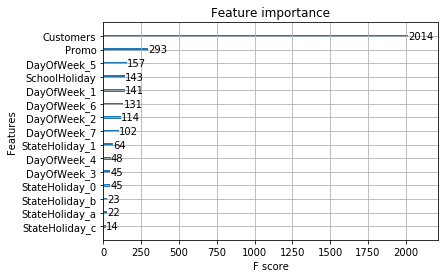

In [38]:
#Importance plot
%matplotlib inline
xgb.plot_importance(xgb_model2)

In [25]:
#grid search
from sklearn.model_selection import GridSearchCV

param_grid={'max_depth':[3,6],'num_boost_round':[100,500,800],'eta':[0.1,0.133,0.12]}

grid_search=GridSearchCV(estimator=xgb_model2,param_grid=param_grid,cv=5,scoring='rmse')

In [27]:
grid_search

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=<xgboost.core.Booster object at 0x000001F006B89B38>,
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 6], 'num_boost_round': [100, 500, 800], 'eta': [0.1, 0.133, 0.12]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='rmse', verbose=0)